## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.657237 -0.819854  0.450456  0.291804  1.438023 -0.684439
1 -0.873699  1.048259  0.907060  0.584045  0.517331  0.462709
2 -1.660515  0.423249 -0.785783 -0.867781  0.743586 -1.176396
3 -0.111400 -1.481320  0.888447  0.431112  0.945082 -0.489707
4  0.074955 -1.648635 -0.688206 -1.171160 -1.771339 -2.225458


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9816051	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9730356	total: 70.1ms	remaining: 35s
2:	learn: 0.9612353	total: 70.8ms	remaining: 23.5s
3:	learn: 0.9496781	total: 71.3ms	remaining: 17.8s
4:	learn: 0.9394376	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9294281	total: 72.5ms	remaining: 12s
6:	learn: 0.9183910	total: 73.1ms	remaining: 10.4s
7:	learn: 0.9093699	total: 73.6ms	remaining: 9.13s
8:	learn: 0.8994077	total: 74.2ms	remaining: 8.16s
9:	learn: 0.8903710	total: 74.8ms	remaining: 7.4s
10:	learn: 0.8805270	total: 75.3ms	remaining: 6.77s
11:	learn: 0.8695038	total: 75.8ms	remaining: 6.24s
12:	learn: 0.8602091	total: 76.4ms	remaining: 5.8s
13:	learn: 0.8509467	total: 76.9ms	remaining: 5.42s
14:	learn: 0.8431046	total: 77.4ms	remaining: 5.08s
15:	learn: 0.8346383	total: 77.9ms	remaining: 4.79s
16:	learn: 0.8258123	total: 78.5ms	remaining: 4.54s
17:	learn: 0.8167858	total: 79ms	remaining: 4.31s
18:	learn: 0.8087788	total: 79.5ms	remaining: 4.11s


82:	learn: 0.4274806	total: 109ms	remaining: 1.21s
83:	learn: 0.4235281	total: 110ms	remaining: 1.2s
84:	learn: 0.4193264	total: 110ms	remaining: 1.19s
85:	learn: 0.4154758	total: 111ms	remaining: 1.18s
86:	learn: 0.4113934	total: 111ms	remaining: 1.17s
87:	learn: 0.4073304	total: 112ms	remaining: 1.16s
88:	learn: 0.4039103	total: 112ms	remaining: 1.15s
89:	learn: 0.4004900	total: 112ms	remaining: 1.14s
90:	learn: 0.3960870	total: 113ms	remaining: 1.13s
91:	learn: 0.3924797	total: 113ms	remaining: 1.12s
92:	learn: 0.3891115	total: 114ms	remaining: 1.11s
93:	learn: 0.3850726	total: 114ms	remaining: 1.1s
94:	learn: 0.3810127	total: 115ms	remaining: 1.09s
95:	learn: 0.3774114	total: 115ms	remaining: 1.08s
96:	learn: 0.3741556	total: 115ms	remaining: 1.07s
97:	learn: 0.3709233	total: 116ms	remaining: 1.07s
98:	learn: 0.3677197	total: 116ms	remaining: 1.06s
99:	learn: 0.3643874	total: 117ms	remaining: 1.05s
100:	learn: 0.3612131	total: 117ms	remaining: 1.04s
101:	learn: 0.3582596	total: 118

242:	learn: 0.1159576	total: 187ms	remaining: 583ms
243:	learn: 0.1151490	total: 188ms	remaining: 582ms
244:	learn: 0.1142174	total: 188ms	remaining: 581ms
245:	learn: 0.1133244	total: 189ms	remaining: 579ms
246:	learn: 0.1124786	total: 190ms	remaining: 578ms
247:	learn: 0.1116657	total: 190ms	remaining: 576ms
248:	learn: 0.1108138	total: 190ms	remaining: 574ms
249:	learn: 0.1099186	total: 191ms	remaining: 573ms
250:	learn: 0.1089928	total: 192ms	remaining: 572ms
251:	learn: 0.1082214	total: 192ms	remaining: 570ms
252:	learn: 0.1073614	total: 192ms	remaining: 568ms
253:	learn: 0.1065276	total: 193ms	remaining: 566ms
254:	learn: 0.1056940	total: 193ms	remaining: 565ms
255:	learn: 0.1049225	total: 194ms	remaining: 564ms
256:	learn: 0.1042312	total: 194ms	remaining: 562ms
257:	learn: 0.1035749	total: 195ms	remaining: 560ms
258:	learn: 0.1027419	total: 195ms	remaining: 558ms
259:	learn: 0.1020292	total: 196ms	remaining: 557ms
260:	learn: 0.1012215	total: 196ms	remaining: 555ms
261:	learn: 

452:	learn: 0.0385201	total: 292ms	remaining: 353ms
453:	learn: 0.0382756	total: 293ms	remaining: 352ms
454:	learn: 0.0382378	total: 293ms	remaining: 352ms
455:	learn: 0.0380081	total: 294ms	remaining: 351ms
456:	learn: 0.0379391	total: 294ms	remaining: 350ms
457:	learn: 0.0378713	total: 295ms	remaining: 349ms
458:	learn: 0.0376403	total: 295ms	remaining: 348ms
459:	learn: 0.0376037	total: 296ms	remaining: 347ms
460:	learn: 0.0375677	total: 296ms	remaining: 346ms
461:	learn: 0.0373653	total: 297ms	remaining: 346ms
462:	learn: 0.0373301	total: 297ms	remaining: 345ms
463:	learn: 0.0371018	total: 298ms	remaining: 344ms
464:	learn: 0.0370672	total: 298ms	remaining: 343ms
465:	learn: 0.0370302	total: 299ms	remaining: 342ms
466:	learn: 0.0369963	total: 299ms	remaining: 341ms
467:	learn: 0.0367749	total: 300ms	remaining: 341ms
468:	learn: 0.0367387	total: 300ms	remaining: 340ms
469:	learn: 0.0367030	total: 300ms	remaining: 339ms
470:	learn: 0.0364840	total: 301ms	remaining: 338ms
471:	learn: 

617:	learn: 0.0234535	total: 370ms	remaining: 229ms
618:	learn: 0.0233245	total: 371ms	remaining: 228ms
619:	learn: 0.0232929	total: 372ms	remaining: 228ms
620:	learn: 0.0232618	total: 372ms	remaining: 227ms
621:	learn: 0.0231261	total: 372ms	remaining: 226ms
622:	learn: 0.0230368	total: 373ms	remaining: 226ms
623:	learn: 0.0230065	total: 373ms	remaining: 225ms
624:	learn: 0.0229505	total: 374ms	remaining: 224ms
625:	learn: 0.0229209	total: 374ms	remaining: 224ms
626:	learn: 0.0228661	total: 375ms	remaining: 223ms
627:	learn: 0.0227411	total: 375ms	remaining: 222ms
628:	learn: 0.0226181	total: 376ms	remaining: 222ms
629:	learn: 0.0225998	total: 376ms	remaining: 221ms
630:	learn: 0.0225463	total: 376ms	remaining: 220ms
631:	learn: 0.0224231	total: 377ms	remaining: 219ms
632:	learn: 0.0223708	total: 377ms	remaining: 219ms
633:	learn: 0.0223528	total: 378ms	remaining: 218ms
634:	learn: 0.0223015	total: 378ms	remaining: 218ms
635:	learn: 0.0221848	total: 379ms	remaining: 217ms
636:	learn: 

835:	learn: 0.0132339	total: 476ms	remaining: 93.3ms
836:	learn: 0.0131899	total: 476ms	remaining: 92.8ms
837:	learn: 0.0131447	total: 477ms	remaining: 92.2ms
838:	learn: 0.0131013	total: 477ms	remaining: 91.6ms
839:	learn: 0.0130586	total: 478ms	remaining: 91ms
840:	learn: 0.0130144	total: 478ms	remaining: 90.5ms
841:	learn: 0.0129723	total: 479ms	remaining: 89.9ms
842:	learn: 0.0129286	total: 480ms	remaining: 89.3ms
843:	learn: 0.0128976	total: 480ms	remaining: 88.7ms
844:	learn: 0.0128559	total: 481ms	remaining: 88.2ms
845:	learn: 0.0128148	total: 481ms	remaining: 87.6ms
846:	learn: 0.0127844	total: 482ms	remaining: 87ms
847:	learn: 0.0127437	total: 482ms	remaining: 86.4ms
848:	learn: 0.0127036	total: 484ms	remaining: 86ms
849:	learn: 0.0126613	total: 484ms	remaining: 85.4ms
850:	learn: 0.0126218	total: 485ms	remaining: 84.8ms
851:	learn: 0.0125792	total: 485ms	remaining: 84.3ms
852:	learn: 0.0125494	total: 486ms	remaining: 83.7ms
853:	learn: 0.0125103	total: 486ms	remaining: 83.1ms

953:	learn: 0.0094866	total: 537ms	remaining: 25.9ms
954:	learn: 0.0094763	total: 538ms	remaining: 25.3ms
955:	learn: 0.0094661	total: 538ms	remaining: 24.8ms
956:	learn: 0.0094372	total: 539ms	remaining: 24.2ms
957:	learn: 0.0094272	total: 539ms	remaining: 23.6ms
958:	learn: 0.0094173	total: 540ms	remaining: 23.1ms
959:	learn: 0.0093890	total: 540ms	remaining: 22.5ms
960:	learn: 0.0093793	total: 540ms	remaining: 21.9ms
961:	learn: 0.0093446	total: 541ms	remaining: 21.4ms
962:	learn: 0.0093350	total: 541ms	remaining: 20.8ms
963:	learn: 0.0093272	total: 542ms	remaining: 20.2ms
964:	learn: 0.0092974	total: 542ms	remaining: 19.7ms
965:	learn: 0.0092898	total: 543ms	remaining: 19.1ms
966:	learn: 0.0092822	total: 544ms	remaining: 18.6ms
967:	learn: 0.0092530	total: 545ms	remaining: 18ms
968:	learn: 0.0092196	total: 545ms	remaining: 17.4ms
969:	learn: 0.0092121	total: 545ms	remaining: 16.9ms
970:	learn: 0.0092032	total: 546ms	remaining: 16.3ms
971:	learn: 0.0091704	total: 546ms	remaining: 15

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

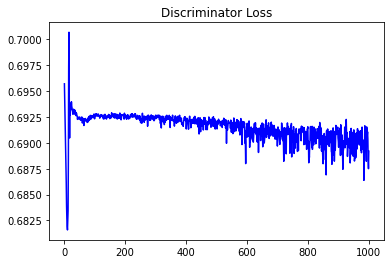

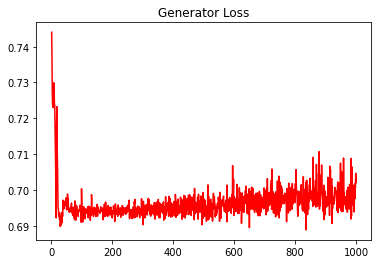

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10801461060449431


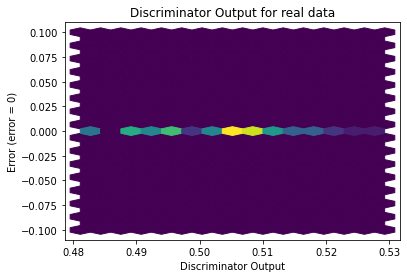

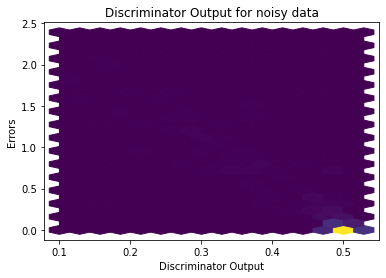

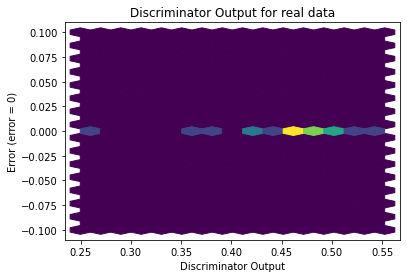

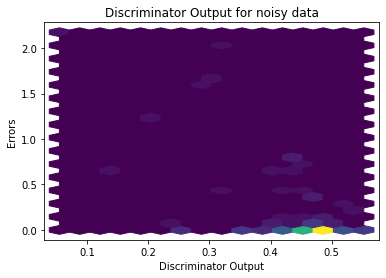

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


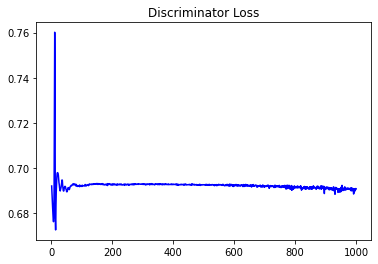

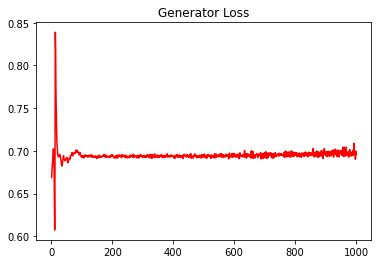

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11932574393693221


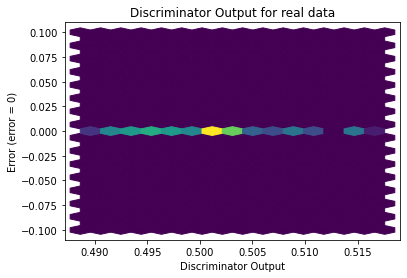

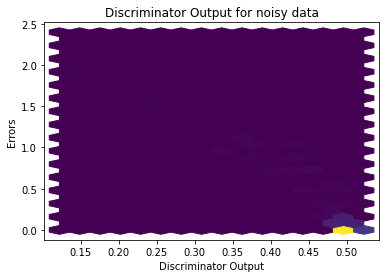

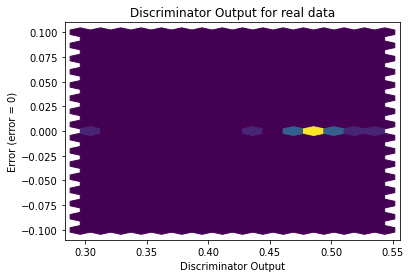

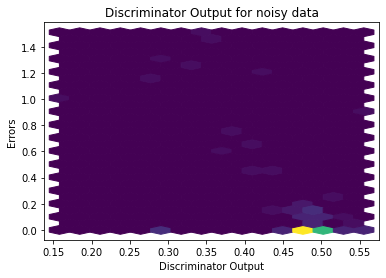

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2914]], requires_grad=True)
